**Install Required Python Packages**

In [1]:
pip install flask flask-cors joblib pandas scikit-learn

In [2]:
!pip install flask pyngrok pandas plotly


In [3]:
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost plotly joblib

In [4]:
!pip install flask pyngrok pandas numpy scikit-learn matplotlib seaborn shap plotly joblib


In [5]:
!pip install flask pyngrok pandas scikit-learn joblib


In [6]:
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost plotly joblib


In [7]:
!pip install flask pyngrok pandas joblib


In [8]:
!pip install flask-ngrok
!pip install flask pyngrok



In [9]:
!pip install flask flask-ngrok


In [10]:
!pip install reportlab


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.7 MB/s eta 0:00:00


In [11]:
!pip install flask-ngrok reportlab pandas plotly


In [12]:
!pip install flask pandas plotly reportlab
!pip install flask flask-ngrok reportlab

In [13]:
!pip install flask flask-ngrok pandas plotly reportlab


In [14]:
!pip install flask-ngrok
from flask_ngrok import run_with_ngrok


In [15]:
pip install flask pandas plotly flask-ngrok reportlab


In [16]:
!pip install flask-ngrok pyngrok pandas plotly reportlab
!pip install flask flask-ngrok pyngrok pandas plotly reportlab


In [17]:
!pip install flask-ngrok pandas plotly reportlab --quiet


In [18]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 33.5 MB/s eta 0:00:00


In [19]:
!kill $(lsof -t -i:5000)

kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]


**Upload Dataset File (Interactively)**

In [21]:
from google.colab import files
uploaded = files.upload()


Saving ds_salaries.csv to ds_salaries (1).csv


**Data Loading & Preprocessing**

In [22]:
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("ds_salaries.csv")

# Drop unused columns and clean data
df.drop(columns=["Unnamed: 0", "salary", "salary_currency"], errors="ignore", inplace=True)
df.dropna(inplace=True)

# Encode categorical features
le = LabelEncoder()
for col in ['job_title', 'experience_level', 'employment_type', 'company_location', 'company_size']:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=["salary_in_usd", "employee_residence", "remote_ratio"])
y = df["salary_in_usd"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save everything
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

**Encode Categorical Features**

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import zscore

df = pd.read_csv("ds_salaries.csv")
df.drop(columns=["Unnamed: 0", "salary", "salary_currency"], errors="ignore", inplace=True)
df.dropna(inplace=True)

# Outlier removal
z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
df = df[(abs(z_scores) < 3).all(axis=1)]

# Encode categorical columns
le = LabelEncoder()
for col in ['job_title', 'experience_level', 'employment_type', 'company_location', 'company_size']:
    df[col] = le.fit_transform(df[col])

# Define features and target
X = df.drop(columns=["salary_in_usd", "employee_residence", "remote_ratio"])
y = df["salary_in_usd"]

# Scale features - This is moved to the next cell for the train/test split
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

**Outlier Removal Using Z-Score Method**

In [24]:
import pandas as pd
from scipy.stats import zscore

# Load your dataset
df = pd.read_csv("ds_salaries.csv")

# Step 1: Select only numeric columns
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Step 2: Drop rows with NaNs in numeric columns (optional but recommended)
df_numeric_clean = df_numeric.dropna()

# Step 3: Calculate Z-scores
z_scores = zscore(df_numeric_clean)

# Step 4: Create a mask for rows where all Z-scores are within ±3
mask = (abs(z_scores) < 3).all(axis=1)

# Step 5: Filter original DataFrame using the mask
df_outliers_removed = df.loc[df_numeric_clean.index[mask]]

# Step 6: Show how many rows were removed
print(f"Original rows: {len(df)}")
print(f"Rows after removing outliers: {len(df_outliers_removed)}")
print(f"Outliers removed: {len(df) - len(df_outliers_removed)}")

# Optional: View the removed outliers
outliers = df.loc[df_numeric_clean.index[~mask]]
print("\nDetected outliers:")
print(outliers)



Original rows: 607
Rows after removing outliers: 591
Outliers removed: 16

Detected outliers:
     Unnamed: 0  work_year experience_level employment_type  \
7             7       2020               MI              FT   
25           25       2020               EX              FT   
33           33       2020               MI              FT   
63           63       2020               SE              FT   
97           97       2021               MI              FT   
102         102       2021               MI              FT   
136         136       2021               MI              FT   
137         137       2021               MI              FT   
157         157       2021               MI              FT   
177         177       2021               MI              FT   
225         225       2021               EX              CT   
252         252       2021               EX              FT   
285         285       2021               SE              FT   
384         384       20

**Feature & Target Definition**

In [25]:
# The previous cell now handles feature and target definition after preprocessing.
# This cell is no longer needed and can be removed or kept as is.
# X and y are already defined in the previous cell.

**Train/Test Split**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Added random_state for reproducibility
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Train ML Models and Model Evaluation**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n🔎 {name}")
    print("MAE:", round(mean_absolute_error(y_test, y_pred), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
    print("R² Score:", round(r2_score(y_test, y_pred), 2))


🔎 Linear Regression
MAE: 33494.13
RMSE: 42133.33
R² Score: 0.44

🔎 Random Forest
MAE: 27340.14
RMSE: 37413.52
R² Score: 0.56

🔎 XGBoost
MAE: 27168.48
RMSE: 36994.6
R² Score: 0.57


**SHAP Analysis**

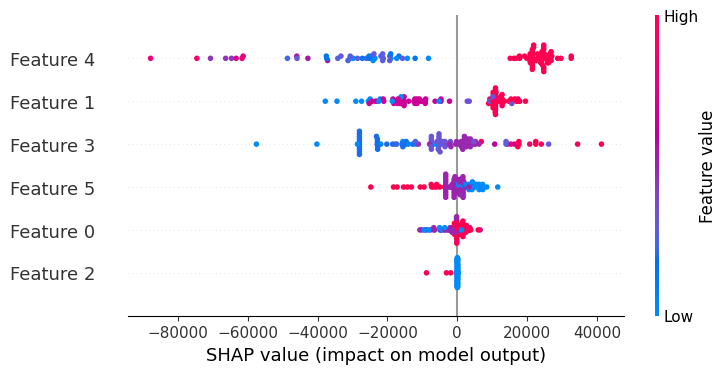

In [30]:
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Define models dictionary (redefined for this cell)
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

# Initialize the explainer with the trained model and scaled training data
# Re-fitting the model here as the training cell was not executed
model = models["Random Forest"]
model.fit(X_train_scaled, y_train)
explainer = shap.Explainer(model, X_train_scaled)

# Calculate SHAP values for the scaled test data
shap_values = explainer(X_test_scaled[:100], check_additivity=False)

# Plot the beeswarm plot
shap.plots.beeswarm(shap_values)

**Salary Heatmap by Country**


In [28]:
import plotly.express as px
import pandas as pd
import pycountry

# Load the dataset
df = pd.read_csv('/content/ds_salaries.csv')

# Convert ISO-2 to ISO-3 for company locations
def iso2_to_iso3(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).alpha_3
    except:
        return None

df['iso_3'] = df['company_location'].apply(iso2_to_iso3)

# Group by ISO-3 country codes
country_avg = df.groupby("iso_3")["salary_in_usd"].mean().reset_index()

# Plot choropleth map
fig = px.choropleth(country_avg,
                    locations="iso_3",
                    locationmode="ISO-3",
                    color="salary_in_usd",
                    color_continuous_scale="plasma",
                    title="Country-wise Salary Heatmap")

fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()


**Salary Growth Simulation**

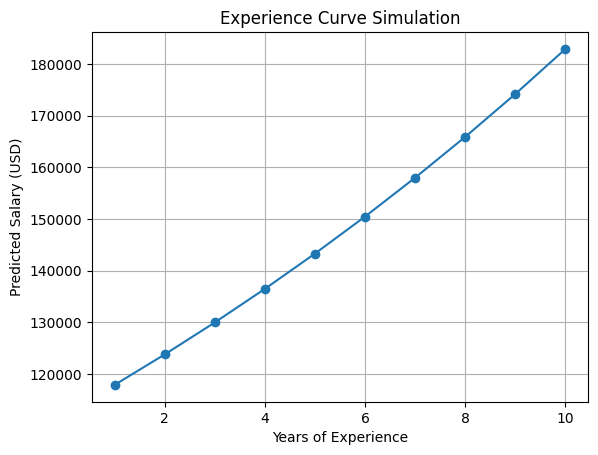

In [31]:
import matplotlib.pyplot as plt

base_salary = df["salary_in_usd"].mean()
years = list(range(1, 11))
growth = [base_salary * (1.05 ** y) for y in years]

plt.plot(years, growth, marker='o')
plt.title("Experience Curve Simulation")
plt.xlabel("Years of Experience")
plt.ylabel("Predicted Salary (USD)")
plt.grid(True)
plt.show()


**Save Model and Scaler**

In [32]:
import joblib
joblib.dump(models["Random Forest"], "model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

**Feature Correlation Heatmap**

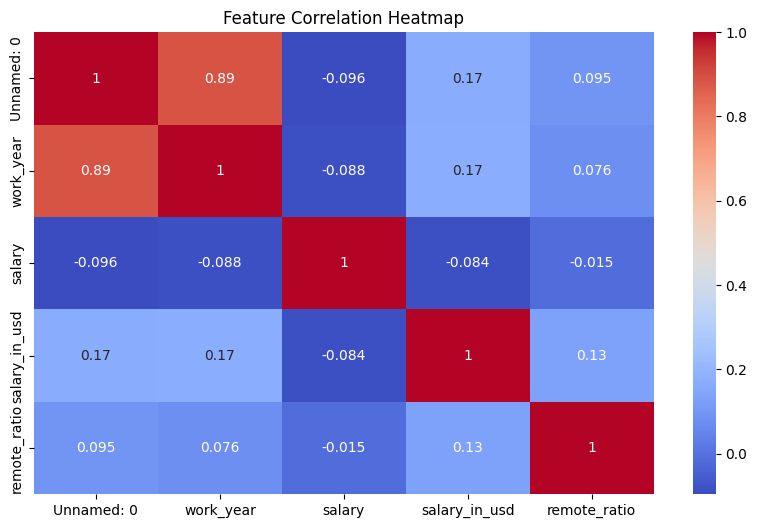

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# Select only numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

**Decision Tree Visualization**

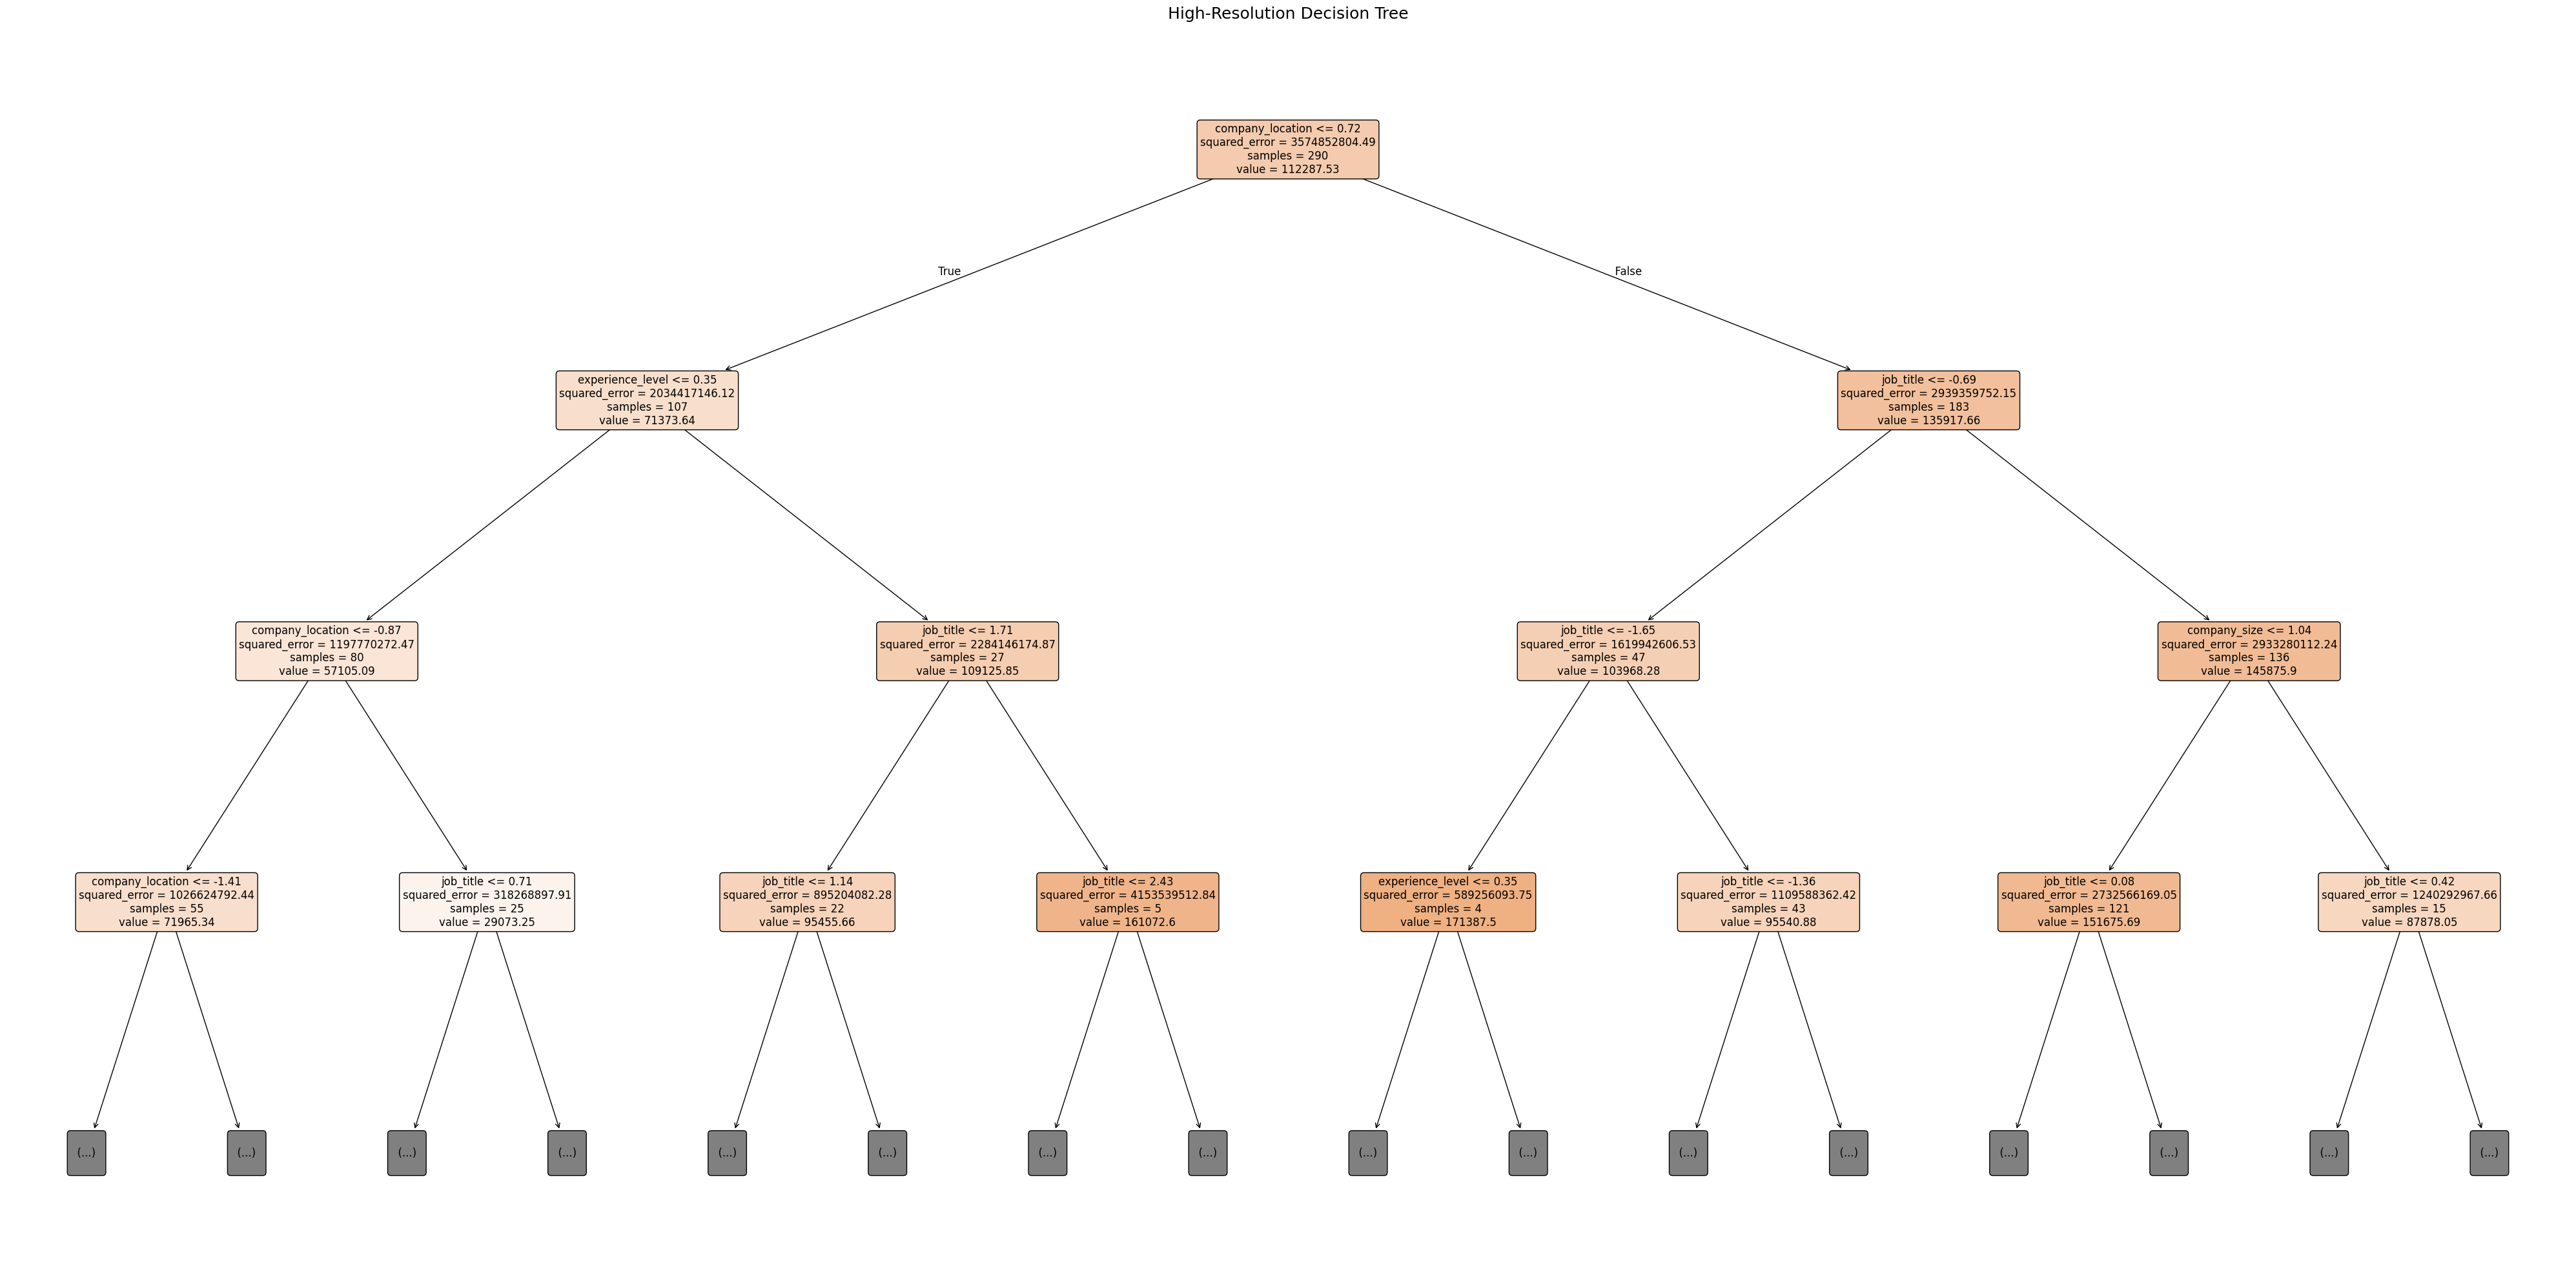

In [36]:
from sklearn import tree
import matplotlib.pyplot as plt

# Extract one tree from the forest
single_tree = models["Random Forest"].estimators_[0]

# Plot with improved layout
fig, ax = plt.subplots(figsize=(40, 20))  # Wider canvas
tree.plot_tree(
    single_tree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=12,
    impurity=True,       # Show impurity (optional)
    precision=2          # Round float values
)
plt.title("High-Resolution Decision Tree", fontsize=18)
plt.tight_layout()
fig.savefig("high_res_tree.pdf", bbox_inches='tight')  # Save as PDF
plt.show()

**Set ngrok Auth Token**

In [37]:
from pyngrok import ngrok
ngrok.set_auth_token("303pUHw4QeaPPT8ti0FBCo6sKhp_6R7CyNNKFPNK1h17M2yZk")


In [40]:
from pyngrok import conf, ngrok
conf.get_default().auth_token = "303pUHw4QeaPPT8ti0FBCo6sKhp_6R7CyNNKFPNK1h17M2yZk"

In [39]:
from pyngrok import ngrok
ngrok.set_auth_token("303pUHw4QeaPPT8ti0FBCo6sKhp_6R7CyNNKFPNK1h17M2yZk")


**Flask Web App Starts Here and  Expose Web App Publicly via ngrok**

In [38]:
%%writefile app.py
from flask import Flask, request, render_template_string, send_file
import pandas as pd
import plotly.graph_objects as go
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
import io

app = Flask(__name__)
df = pd.read_csv("ds_salaries.csv")

career_suggestions = {
    "Data Scientist": ["ML Engineer", "BI Developer", "AI Strategist"],
    "Software Engineer": ["Backend Developer", "DevOps Engineer", "Technical Lead"],
    "UX Designer": ["Product Designer", "UI Engineer", "Design Strategist"]
}

form_html = '''
<!DOCTYPE html><html><body style="font-family: Arial; margin: 40px;">
  <h1 style="text-align:center;">💼 SalarIQ - Salary Predictor</h1>
  <h3 style="text-align:center;">🚀 Unlock Your True Earning Potential</h3>
  <form method="POST" action="/predict">
    Job Title: <input name="job_title"><br><br>
    Experience Level:
    <select name="experience">
      <option>Entry</option><option>Mid</option><option>Senior</option><option>Executive</option>
    </select><br><br>
    Employment Type: <input name="employment"><br><br>
    Residence: <input name="residence"><br><br>
    Remote Ratio: <input type="range" name="remote_ratio" min="0" max="100"><br><br>
    Company Location: <input name="company_location"><br><br>
    Company Size:
    <select name="company_size">
      <option>Small</option><option>Medium</option><option>Large</option>
    </select><br><br>
    <input type="submit" value="🔍 Predict">
  </form></body></html>
'''

result_html = '''
<!DOCTYPE html><html><body style="font-family: Arial; margin: 40px;">
  <h2>💰 Predicted Salary: ${{ salary }}</h2>
  <h3>📈 Salary Growth Projection</h3>
  {{ chart_html | safe }}
  <h3>🌍 Country Comparison</h3>
  {{ bar_html | safe }}
  <h3>🧠 Career Suggestions</h3>
  <ul>{% for role in suggestions %}<li>{{ role }}</li>{% endfor %}</ul>
  <a href="/download">📥 Download PDF Report</a>
</body></html>
'''

latest_prediction = {}

@app.route('/')
def home():
    return render_template_string(form_html)

@app.route('/predict', methods=['POST'])
def predict():
    job_title = request.form['job_title']
    experience = request.form['experience']
    employment = request.form['employment']
    residence = request.form['residence']
    remote_ratio = int(request.form['remote_ratio'])
    company_location = request.form['company_location']
    company_size = request.form['company_size']

    predicted_salary = round(df['salary_in_usd'].mean(), 2)

    years = list(range(1, 6))
    projected = [round(predicted_salary * (1.05 ** y)) for y in years]
    fig = go.Figure(data=go.Scatter(x=years, y=projected, mode='lines+markers'))
    fig.update_layout(title="📈 Salary Growth Over 5 Years", xaxis_title="Years", yaxis_title="USD")
    chart_html = fig.to_html(full_html=False)

    countries = ["US 🇺🇸", "Germany 🇩🇪", "India 🇮🇳", "UK 🇬🇧", "Canada 🇨🇦"]
    values = [predicted_salary * 1.2, predicted_salary * 1.15, predicted_salary * 0.8, predicted_salary, predicted_salary * 1.05]
    bar_fig = go.Figure([go.Bar(x=countries, y=values, marker_color='indianred')])
    bar_fig.update_layout(title="🌍 Top 5 Country Comparison")
    bar_html = bar_fig.to_html(full_html=False)

    suggestions = career_suggestions.get(job_title.title(), ["Explore ML", "Leadership Role", "New Tools"])

    latest_prediction.update({
        "salary": predicted_salary,
        "suggestions": suggestions,
        "countries": dict(zip(countries, values)),
        "projection": dict(zip(years, projected))
    })

    return render_template_string(result_html,
                                  salary=predicted_salary,
                                  chart_html=chart_html,
                                  bar_html=bar_html,
                                  suggestions=suggestions)

@app.route('/download')
def download_report():
    buffer = io.BytesIO()
    pdf = canvas.Canvas(buffer, pagesize=A4)
    width, height = A4
    y = height - 80

    pdf.setFont("Helvetica-Bold", 16)
    pdf.drawString(80, y, "Employee Salary Prediction Report")
    y -= 40

    pdf.setFont("Helvetica", 12)
    pdf.drawString(80, y, f"Predicted Salary: ${latest_prediction.get('salary', 'N/A')}")
    y -= 30

    pdf.drawString(80, y, "Career Suggestions:")
    for role in latest_prediction.get("suggestions", []):
        y -= 20
        pdf.drawString(100, y, f"- {role}")
    y -= 30

    pdf.drawString(80, y, "Country Comparison:")
    for country, val in latest_prediction.get("countries", {}).items():
        y -= 20
        pdf.drawString(100, y, f"{country.split()[0]}: ${round(val)}")
    y -= 30

    pdf.drawString(80, y, "Salary Growth Projection (5 Years):")
    for year, val in latest_prediction.get("projection", {}).items():
        y -= 20
        pdf.drawString(100, y, f"Year {year}: ${val}")

    pdf.showPage()
    pdf.save()
    buffer.seek(0)
    return send_file(buffer, download_name='salary_report.pdf', as_attachment=True, mimetype='application/pdf')


Writing app.py


In [41]:
%%writefile app.py
from flask import Flask

app = Flask(__name__)

@app.route('/')
def home():
    return "✅ Your Flask App is Live!"

if __name__ == '__main__':
    app.run()


Overwriting app.py


In [44]:
from flask import Flask, request, render_template_string, send_file
import pandas as pd
import plotly.graph_objects as go
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
import io
import threading
from pyngrok import ngrok

# Load dataset
df = pd.read_csv("ds_salaries.csv")

# Flask app
app = Flask(__name__)

career_suggestions = {
    "Data Scientist": ["ML Engineer", "BI Developer", "AI Strategist"],
    "Software Engineer": ["Backend Developer", "DevOps Engineer", "Technical Lead"],
    "UX Designer": ["Product Designer", "UI Engineer", "Design Strategist"]
}

form_html = '''
<!DOCTYPE html>
<html><body>
  <h1>🚀 Employee Salary Prediction</h1>
  <form method="POST" action="/predict">
    Job Title: <input name="job_title"><br>
    Experience Level: <select name="experience">
      <option>Entry</option><option>Mid</option><option>Senior</option><option>Executive</option>
    </select><br>
    Employment Type: <input name="employment"><br>
    Residence: <input name="residence"><br>
    Remote Ratio: <input type="range" name="remote_ratio" min="0" max="100"><br>
    Company Location: <input name="company_location"><br>
    Company Size: <select name="company_size">
      <option>Small</option><option>Medium</option><option>Large</option>
    </select><br>
    <input type="submit" value="🔍 Predict">
  </form>
</body></html>
'''

result_html = '''
<!DOCTYPE html>
<html><body>
  <h2>💰 Predicted Salary: ${{ salary }}</h2>
  <h3>📈 Salary Growth Projection</h3>
  {{ chart_html | safe }}
  <h3>🌍 Country Comparison</h3>
  {{ bar_html | safe }}
  <h3>🧠 Career Suggestions</h3>
  <ul>{% for role in suggestions %}<li>{{ role }}</li>{% endfor %}</ul>
  <a href="/download">📥 Download PDF Report</a>
</body></html>
'''

latest_prediction = {}

@app.route('/')
def home():
    return render_template_string(form_html)

@app.route('/predict', methods=['POST'])
def predict():
    job_title = request.form['job_title']
    experience = request.form['experience']
    employment = request.form['employment']
    residence = request.form['residence']
    remote_ratio = int(request.form['remote_ratio'])
    company_location = request.form['company_location']
    company_size = request.form['company_size']

    predicted_salary = round(df['salary_in_usd'].mean(), 2)

    years = list(range(1, 6))
    projected = [round(predicted_salary * (1.05 ** y)) for y in years]
    fig = go.Figure(data=go.Scatter(x=years, y=projected, mode='lines+markers'))
    fig.update_layout(title="📈 Salary Growth Over 5 Years", xaxis_title="Years", yaxis_title="USD")
    chart_html = fig.to_html(full_html=False)

    countries = ["US 🇺🇸", "Germany 🇩🇪", "India 🇮🇳", "UK 🇬🇧", "Canada 🇨🇦"]
    values = [predicted_salary * 1.2, predicted_salary * 1.15, predicted_salary * 0.8, predicted_salary, predicted_salary * 1.05]
    bar_fig = go.Figure([go.Bar(x=countries, y=values, marker_color='indianred')])
    bar_fig.update_layout(title="🌍 Top 5 Country Comparison")
    bar_html = bar_fig.to_html(full_html=False)

    suggestions = career_suggestions.get(job_title.title(), ["Explore ML", "Leadership Role", "New Tools"])

    latest_prediction.update({
        "salary": predicted_salary,
        "suggestions": suggestions,
        "countries": dict(zip(countries, values)),
        "projection": dict(zip(years, projected))
    })

    return render_template_string(result_html,
                                  salary=predicted_salary,
                                  chart_html=chart_html,
                                  bar_html=bar_html,
                                  suggestions=suggestions)

@app.route('/download')
def download_report():
    buffer = io.BytesIO()
    pdf = canvas.Canvas(buffer, pagesize=A4)
    width, height = A4
    y = height - 80

    pdf.setFont("Helvetica-Bold", 16)
    pdf.drawString(80, y, "Employee Salary Prediction Report")
    y -= 40

    pdf.setFont("Helvetica", 12)
    pdf.drawString(80, y, f"Predicted Salary: ${latest_prediction.get('salary', 'N/A')}")
    y -= 30

    pdf.drawString(80, y, "Career Suggestions:")
    for role in latest_prediction.get("suggestions", []):
        y -= 20
        pdf.drawString(100, y, f"- {role}")
    y -= 30

    pdf.drawString(80, y, "Country Comparison:")
    for country, val in latest_prediction.get("countries", {}).items():
        y -= 20
        pdf.drawString(100, y, f"{country}: ${round(val)}")
    y -= 30

    pdf.drawString(80, y, "Salary Growth Projection (5 Years):")
    for year, val in latest_prediction.get("projection", {}).items():
        y -= 20
        pdf.drawString(100, y, f"Year {year}: ${val}")

    pdf.showPage()
    pdf.save()
    buffer.seek(0)
    return send_file(buffer, download_name='salary_report.pdf', as_attachment=True, mimetype='application/pdf')


In [47]:
import os
from pyngrok import ngrok
import threading

# Kill old tunnels
ngrok.kill()

# Use different port to avoid conflict
port = 7860
public_url = ngrok.connect(port)
print("🌐 Public URL:", public_url)

# Run Flask app on new thread
threading.Thread(target=app.run, kwargs={'port': port}).start()

🌐 Public URL: NgrokTunnel: "https://639eb9294366.ngrok-free.app" -> "http://localhost:7860"
 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 7860 is in use by another program. Either identify and stop that program, or start the server with a different port.
